In [3]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
import math
from PIL import Image
import os
import sklearn.cluster
from joblib import dump, load

In [4]:
model = load('model.joblib') 

In [5]:
# 4
def ImgToVec(img):
    gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    kp = sift.detect(gray,None)
    arr = [d.pt for d in kp]
    prediction = model.predict(arr)
    hist, bin_edges = np.histogram(prediction, bins=1024)
    return hist

In [76]:
#5
import pandas as pd

path = 'c:/Users/stalk/GitReps/Laboratory-13.-Search-for-similar-images/VOC2012/JPEGImages'

def IndexThisShit(path):
    ind = 0
    df = pd.DataFrame(columns=['ind','path','vect'])
    for filename in os.listdir(path):
        pt = path+'/'+filename
        img = cv.imread(pt)
        res = ImgToVec(img)
        rs = " ".join(map(str,res))
        
        new_row = [ind, pt, rs]
        #df = df.append(new_row, ignore_index=True)
        df.loc[ len(df.index )] = new_row
        ind+=1
        if ind > 5000:
            break
    #return Arr
    df.to_csv('c:/Users/stalk/GitReps/Laboratory-13.-Search-for-similar-images/5DS.csv')


In [77]:
#5
IndexThisShit(path)

In [78]:
#5
def decode(str):
    str = str.split(' ')
    #str =map(float, str)
    str = np.asarray(list(map(float, str)))
    str = str / np.sum(str)
    return list(str)

def get_from_csv(csv_path):
    dataframe = pd.read_csv(csv_path)
    dataframe['vect'] = dataframe['vect'].map(decode)
    return dataframe

df = get_from_csv('c:/Users/stalk/GitReps/Laboratory-13.-Search-for-similar-images/5DS.csv')


In [79]:
df

Unnamed: 0   ind                                               path  \
0              0     0  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
1              1     1  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
2              2     2  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
3              3     3  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
4              4     4  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
...          ...   ...                                                ...   
4996        4996  4996  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
4997        4997  4997  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
4998        4998  4998  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
4999        4999  4999  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   
5000        5000  5000  c:/Users/stalk/GitReps/Laboratory-13.-Search-f...   

                                                   vect  
0     [0.0040853381752156154, 0.00045392646391284613...  
1     [0.005277044854881266, 0.0, 0.0, 0.00791556728...  
2     [0.002127659574468085, 0.0, 0.0, 0.0, 0.0, 0.0...  
3     [0.005305039787798408, 0.0, 0.0, 0.0, 0.0, 0.0...  
4     [0.008865248226950355, 0.0, 0.0017730496453900...  
...                                                 ...  
4996  [0.0033585222502099076, 0.00041981528127623844...  
4997  [0.007272727272727273, 0.0, 0.0, 0.0, 0.0, 0.0...  
4998  [0.007339449541284404, 0.0, 0.0, 0.00366972477...  
4999  [0.007936507936507936, 0.0, 0.0, 0.00264550264...  
5000  [0.002207505518763797, 0.0, 0.0, 0.00294334069...  

[5001 rows x 4 columns]

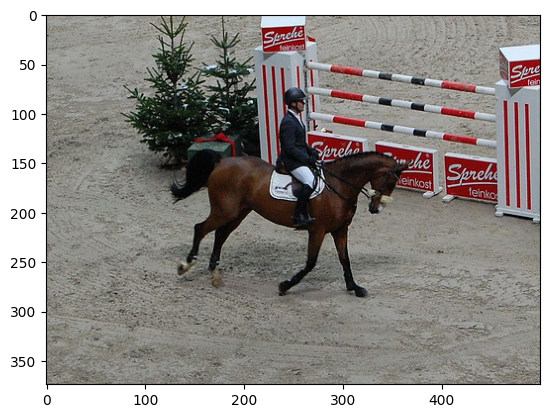

In [80]:
#6
import scipy
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

def load_rbg(path):
    return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

path = 'c:/Users/stalk/GitReps/Laboratory-13.-Search-for-similar-images/VOC2012/JPEGImages/2011_007199.jpg'
#img = cv.imread(path)#coder_kmeans.encode(path)
img = load_rbg(path)
plt.imshow(load_rbg(path))

In [81]:
neighbors_kmeans = NearestNeighbors(n_neighbors=5, metric='cosine', n_jobs=-1)
neighbors_kmeans.fit(np.vstack(df['vect'].values), df.index.values)
img = ImgToVec(img)
img = img / np.sum(img)
_, indices_kmeans = neighbors_kmeans.kneighbors([img], n_neighbors=10)
indices_kmeans

array([[ 827, 2910, 4906, 4739, 3207, 4468, 2207, 4905, 1793, 4424]],
      dtype=int64)

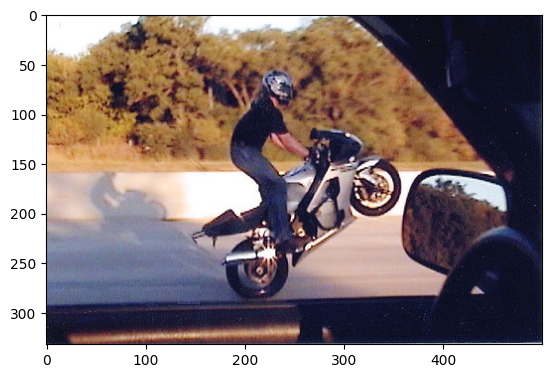

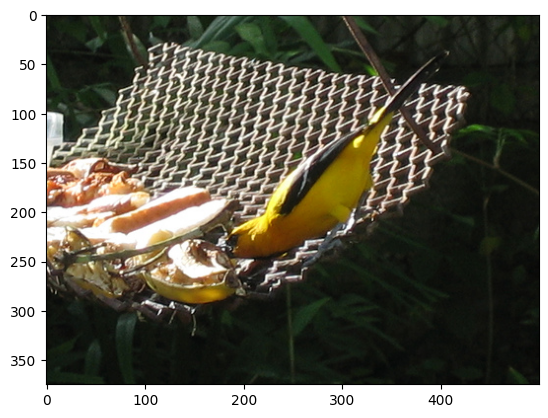

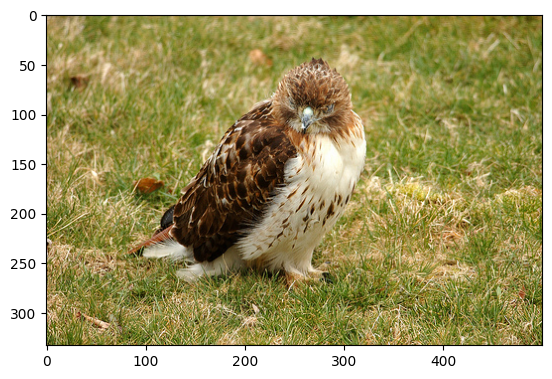

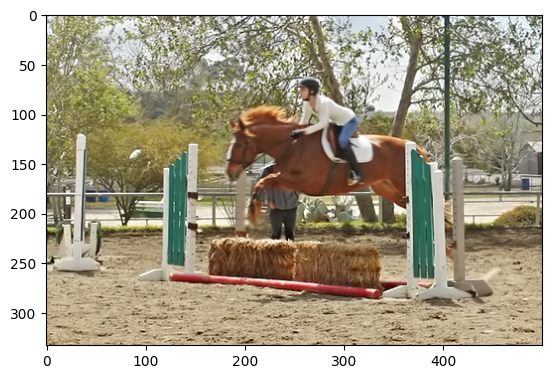

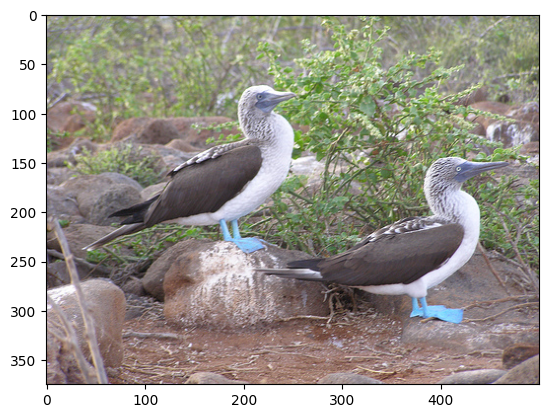

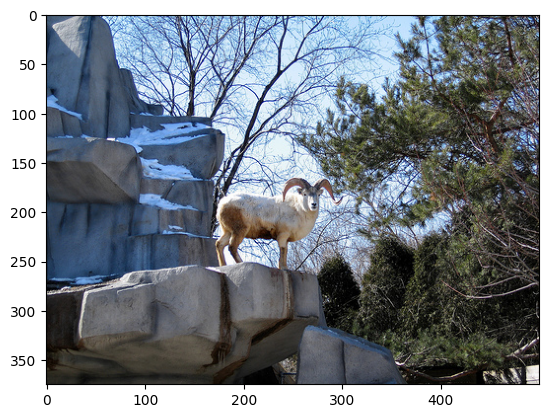

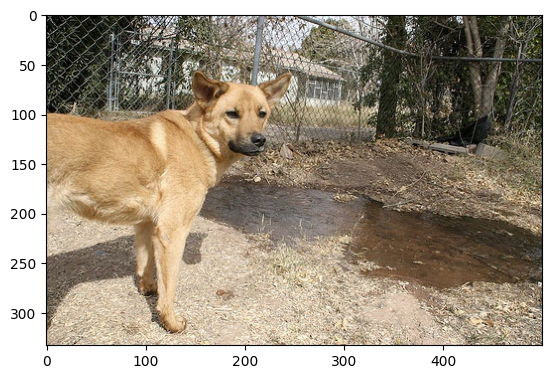

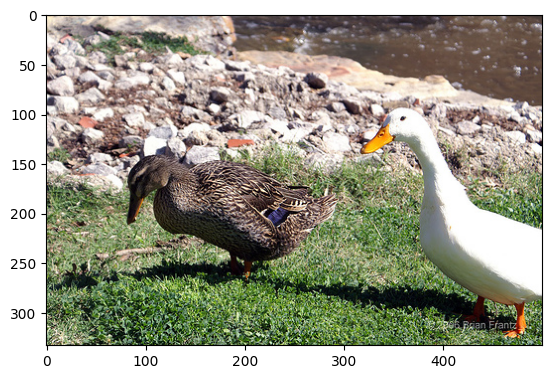

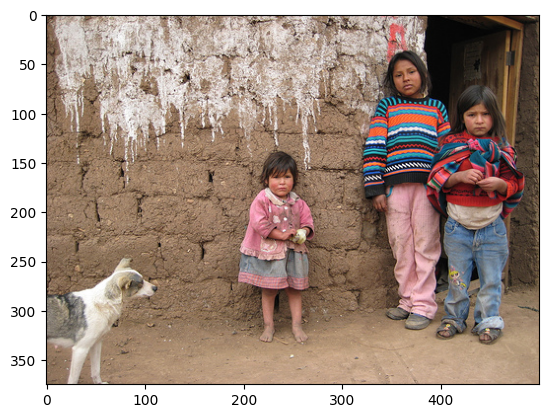

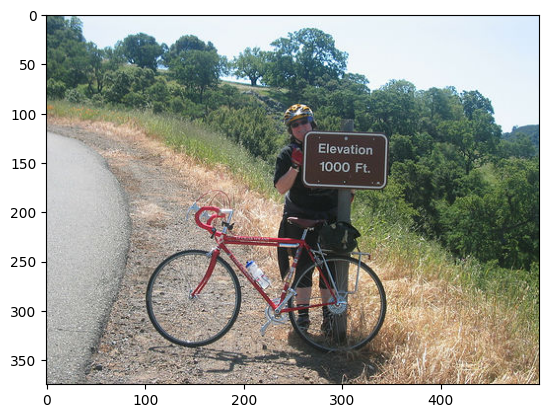

In [82]:
for idx in indices_kmeans.flat:
    plt.imshow(load_rbg(df.loc[idx]['path']))
    plt.show()